In [16]:
%matplotlib inline
#%matplotlib widget

In [17]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [18]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [31]:
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_21bots.csv'
passive_path_packaged='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
Passive_path_table=pd.read_csv(passive_path,index_col=0)
emsd_data=pd.DataFrame()
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
#rerelevant_data=Passive_path_table.loc[bottype,diameter]
for diameter in diameters:
    for bottype in bottypes:
        relevant_data=Passive_path_table[(Passive_path_table['diameter']==diameter)&(Passive_path_table['BotType']==bottype)]
        filenames=pd.unique(relevant_data['Filename'])
        print(filenames)
        particle=0
        for filename in filenames:
            emsd_file_data=relevant_data[(relevant_data['Filename']==filename)]
            emsd_file_data=emsd_file_data.iloc[:,0:4]
            emsd_file_data['particle']=[particle]*len(emsd_file_data)
            emsd_file_data['diameter']=[diameter]*len(emsd_file_data)
            emsd_file_data['BotType']=[bottype]*len(emsd_file_data)
            emsd_data=pd.concat([emsd_data,emsd_file_data],axis=0,ignore_index=True)
            particle=particle+1
print(emsd_data)

['fronter_N021_D007_C0541.MP4_link.csv'
 'fronter_N021_D007_C0540.MP4_link.csv'
 'fronter_N021_D007_C0539.MP4_link.csv'
 'fronter_N021_D007_C0538.MP4_link.csv']
['aligner_N021_D007_C0548.MP4_link.csv'
 'aligner_N021_D007_C0547.MP4_link.csv'
 'aligner_N021_D007_C0544.MP4_link.csv'
 'aligner_N021_D007_C0542.MP4_link.csv']
['fronter_N021_D012_C0537.MP4_link.csv'
 'fronter_N021_D012_C0536.MP4_link.csv'
 'fronter_N021_D012_C0535.MP4_link.csv'
 'fronter_N021_D012_C0534.MP4_link.csv'
 'fronter_N021_D012_C0533.MP4_link.csv']
['aligner_N021_D012_C0532.MP4_link.csv'
 'aligner_N021_D012_C0531.MP4_link.csv'
 'updated_test_aligner_N021_D012_C0530.MP4_link.csv'
 'aligner_N021_D012_C0529.MP4_link.csv']
['fronter_N021_D018_C0521.MP4_link.csv'
 'fronter_N021_D018_C0519.MP4_link.csv'
 'fronter_N021_D018_C0514.MP4_link.csv'
 'fronter_N021_D018_C0516.MP4_link.csv'
 'fronter_N021_D018_C0517.MP4_link.csv']
['updated_test_aligner_N021_D018_C0527.MP4_link.csv'
 'aligner_N021_D018_C0526.MP4_link.csv'
 'aligner

lagt
4.00     0.385302
4.04     0.392041
4.08     0.399018
4.12     0.405912
4.16     0.413314
           ...   
19.84    6.497782
19.88    6.519651
19.92    6.541327
19.96    6.562702
20.00    6.584755
Name: msd, Length: 401, dtype: float64
[ 1.76459244 -3.38288497]
[0.00099504 0.00242515]


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


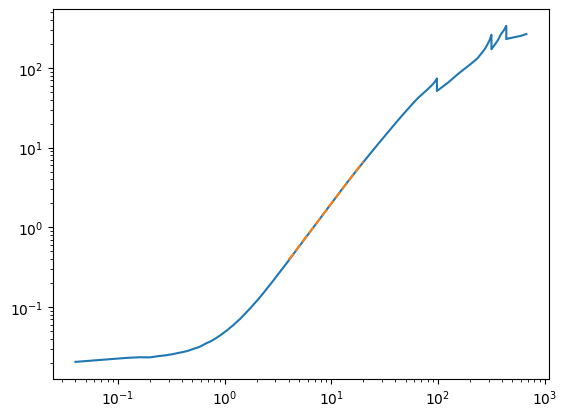

In [26]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
bottype='fronter'
diameter=28
relevant_emsd=emsd_data[(emsd_data['diameter']==diameter)&(emsd_data['BotType']==bottype)]
#print(relevant_emsd)
emsd_data_filtered = tp.filter_stubs(relevant_emsd,threshold=100)
max_lagtime=int(len(emsd_data_filtered)/3)
emsd=tp.emsd(emsd_data_filtered,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
#emsd_small_range=emsd.loc[2:50]
emsd_small_range=emsd.loc[4:20]
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(emsd_small_range.index),np.log(emsd_small_range),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fig, ax = plt.subplots()
ax.plot(emsd.index, emsd)
ax.set_xscale('log')
ax.set_yscale('log')
fit_x=np.log(emsd_small_range.index)
fit_y=fit_x*popt[0]+popt[1]
ax.loglog(np.exp(fit_x),np.exp(fit_y),'--')

In [32]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
emsd_results=pd.DataFrame()
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
for diameter in diameters:
    for bottype in bottypes:
        print("diameter {},BotType {}".format(diameter,bottype))
        data_row=pd.DataFrame()
        relevant_emsd=emsd_data[(emsd_data['diameter']==diameter)&(emsd_data['BotType']==bottype)]
        #print(relevant_emsd)
        emsd_data_filtered = tp.filter_stubs(relevant_emsd,threshold=100)
        max_lagtime=int(len(emsd_data_filtered)/3)
        emsd=tp.emsd(emsd_data_filtered,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
        emsd_large_range=emsd.loc[2:50]
        emsd_small_range=emsd.loc[4:20]
        p0=np.array([2,0.5])
        popt_min,pcov_min = sc.optimize.curve_fit(linear_fit_log,np.log(emsd_small_range.index),np.log(emsd_small_range),p0=p0)
        perr_min = np.sqrt(np.diag(pcov))
        corr_min=np.corrcoef(pcov,rowvar=True)
        popt_max,pcov_max = sc.optimize.curve_fit(linear_fit_log,np.log(emsd_large_range.index),np.log(emsd_large_range),p0=p0)
        perr_max = np.sqrt(np.diag(pcov))
        corr_max=np.corrcoef(pcov,rowvar=True)
        data_row['diameter']=[diameter]
        data_row['BotType']=[bottype]
        data_row['n_max']=[popt_max[0]]
        data_row['n_max_err']=[perr_max[0]]
        data_row['A_max']=[np.exp(popt_max[1])]
        data_row['A_max_err']=[perr_max[1]]
        data_row['n_min']=[popt_min[0]]
        data_row['n_min_err']=[perr_min[0]]
        data_row['A_min']=[np.exp(popt_min[1])]
        data_row['A_min_err']=[perr_min[1]]
        emsd_results=pd.concat([emsd_results,data_row],axis=0)
emsd_results.to_csv(passive_path_packaged+'\\power_law_21_bots_emsd.csv')

diameter 7,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 7,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 12,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 12,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 18,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 18,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 28,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupb

diameter 28,BotType aligner
diameter 32,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


diameter 32,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


In [33]:
mean_data=emsd_results.groupby(by=["BotType","diameter"]).mean()
print(mean_data.loc[("fronter","n_min")])
std_data=emsd_results.groupby(by=["BotType","diameter"]).std()
#print(std_data)

diameter
7     1.345120
12    1.659548
18    1.751224
28    1.764592
32    1.816885
Name: n_min, dtype: float64
                  n_max  n_max_err  A_max  A_max_err  n_min  n_min_err  A_min  \
BotType diameter                                                                
aligner 7           NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        12          NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        18          NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        28          NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        32          NaN        NaN    NaN        NaN    NaN        NaN    NaN   
fronter 7           NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        12          NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        18          NaN        NaN    NaN        NaN    NaN        NaN    NaN   
        28          NaN        NaN    NaN        NaN    NaN        NaN    NaN 

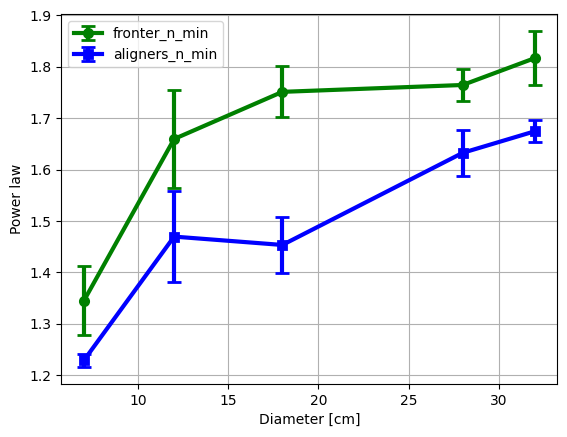

In [36]:
fronter_data=mean_data.loc[("fronter","n_min")]
fronter_data_max= mean_data.loc[("fronter","n_max")]
fronter_diff=fronter_data-fronter_data_max
aligner_data=mean_data.loc[("aligner","n_min")]
aligner_data_max=mean_data.loc[("aligner","n_max")]
aligner_diff=aligner_data-aligner_data_max
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data,label='fronter_n_min',yerr=np.abs(fronter_diff.to_numpy())/2,marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_data,label='aligners_n_min',yerr=np.abs(aligner_diff.to_numpy())/2,marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('Power law')
ax.grid()
ax.legend()
saved_data=pd.DataFrame(data={'fronter_data': fronter_data
                              ,'fronter_data_max': fronter_data_max,'fronter_diff':fronter_diff,'aligner_data':aligner_data
                              ,'aligner_data_max':aligner_data_max,'aligner_diff':aligner_diff})
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\emsd_powerlaw_vs_diameter_21bots.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\emsd_powerlaw_vs_diameter_21bots.png',bbox_inches='tight')